# $$Ziad$$ $$Mohamed$$ $$Taha$$
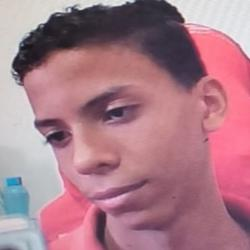

# ````import```` the $$libraries$$ 

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# `load `***the*** $data$

In [6]:
# Load and preprocess the MNIST dataset
# MNIST contains 28x28 grayscale images of handwritten digits (0-9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# `encoding` ***the*** $data$

In [9]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ***build*** *the* $Model$ 

In [12]:
# Build the ANN model
model = Sequential()

# Flatten the input data (from 28x28 to 784-dimensional vector)
model.add(Flatten(input_shape=(28, 28)))

# Hidden layer 1: Dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Hidden layer 2: Dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer: Dense layer with 10 neurons (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# $$train$$ $$the$$ $$Model$$

In [15]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8591 - loss: 0.4738 - val_accuracy: 0.9572 - val_loss: 0.1398
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1184 - val_accuracy: 0.9685 - val_loss: 0.1077
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9774 - loss: 0.0741 - val_accuracy: 0.9694 - val_loss: 0.0923
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0569 - val_accuracy: 0.9725 - val_loss: 0.0942
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0426 - val_accuracy: 0.9679 - val_loss: 0.1116
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9898 - loss: 0.0328 - val_accuracy: 0.9724 - val_loss: 0.0974
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9734 - val_loss: 0.1009
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9933 - loss: 0.0210 - 

# $show %% the accuracy$ $$the$$ $$Accuracy$$

In [22]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9749 - loss: 0.2063
Test accuracy: 0.9793000221252441


In [30]:
model.save("D:\\Ziad\\ANN_model.hdf5")

In [32]:
from tensorflow.keras.models import load_model

# Load the entire model from the .h5 file
model = load_model("D:\\Ziad\\ANN_Model.hdf5")


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "C:\\Users\\hp\\Pictures\\download.png"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(28, 28))  # Resize the image to 32x32 pixels
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 32, 32, 3)
img_array = img_array / 255.0  # Normalize the image (assuming your model was trained with normalized images)


In [50]:
# Predict the class of the image
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 28, 28, 3), dtype=float32). Expected shape (None, 28, 28), but input has incompatible shape (1, 28, 28, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 28, 28, 3), dtype=float32)
  • training=False
  • mask=None

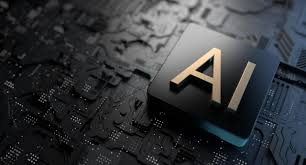  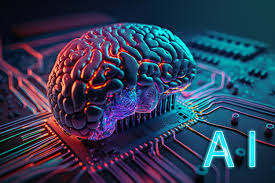